# **Introduction**

Deep Learning Project on Insurance Claim using ANN

> This Deep Learning Project detects whether the Insurance owner should get there claim or not


---


## ***About Dataset***


> 1.   Agency - Agency name
1.   Feature -			Description
2.   ID 			-	Unique identifier
2.   Agency Type 	-	Type of travel insurance agency
1.   Distribution Channel -	Online/Offline distribution channel
2.   Product Name 	-	Travel insurance product name
1.   Duration 	-		Duration of travel
2.   Destination 		-	Destination of travel
1.   Net sales 		-	Net sales of travel insurance policies
2.   Commision 	-	The commission received by travel insurance  agency
1.   Gender 	-		Traveller's gender
2.   Age 			-	Traveller's Age








# **Visualization & Preprocessing**




## *Importing the Necessary Libraries*

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings as we
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from palettable.colorbrewer.qualitative import Pastel1_7, Set2_7, Dark2_7, Accent_7
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

we.filterwarnings('ignore')

## *EDA & Preprocessing*

In [517]:
df = pd.read_csv('/content/drive/MyDrive/ML, DL & AI/Deep Learning/data.csv') # Reading the Data
df

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...
50548,17315,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,NETHERLANDS,99.0,59.40,NaN,50
50549,35595,EPX,Travel Agency,Online,1 way Comprehensive Plan,0,48,INDONESIA,20.0,0.00,NaN,36
50550,54146,KML,Travel Agency,Online,Value Plan,0,24,INDONESIA,28.0,10.64,F,48
50551,28667,EPX,Travel Agency,Online,Cancellation Plan,0,25,BELGIUM,15.0,0.00,NaN,36


In [518]:
# Replacing Column Names

df.rename(columns={ 'Agency Type':'Agency Type', 'Distribution Channel':'Distribution Channel', 'Product Name':'Product Name','Net Sales':'Net Sales', 'Commision (in value)':'Commision'},inplace=True)

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision             50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [520]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
dtype: int64

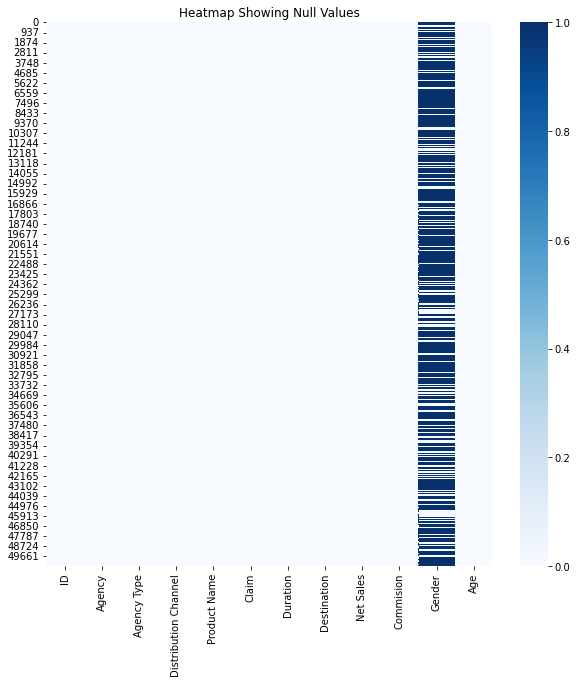

In [521]:
plt.figure(figsize = (10,10))
plt.title('Heatmap Showing Null Values')
sns.heatmap(data = df.isnull(), cmap='Blues')
plt.show()



```
# As the null values are more than 50% we can drop the column
# Also ID column is not necessory so we can drop that column
```



In [522]:
df.drop('Gender', axis = 1, inplace = True)
df.drop('ID', axis = 1, inplace = True)

In [523]:
dest = df.groupby(by=["Destination"]).size().reset_index(name="counts")
dest.nlargest(15,['counts'])
dest['DestinationNew'] = np.where(dest['counts']>1090, dest['Destination'], 'Others')
fig = px.pie(dest, values='counts', names='DestinationNew', title='Popular Destinations Among Insured')
fig.show()



> A Pie Chart showing 15 Most Popular Destinations Among Travel Insured



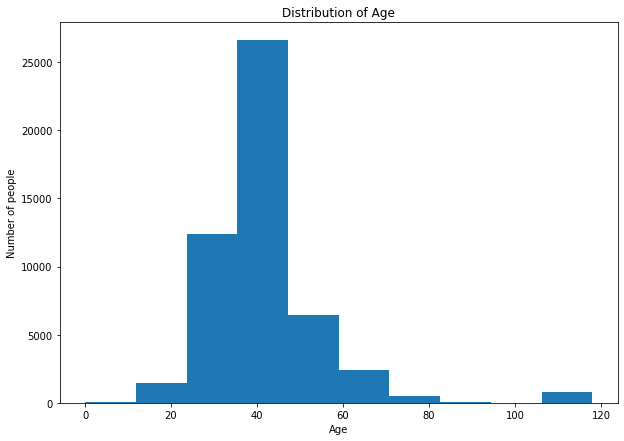

In [524]:
plt.figure(figsize = (10,7))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()



> From the graph, the majory of people opting for travel insurance are of the age 35 to 50



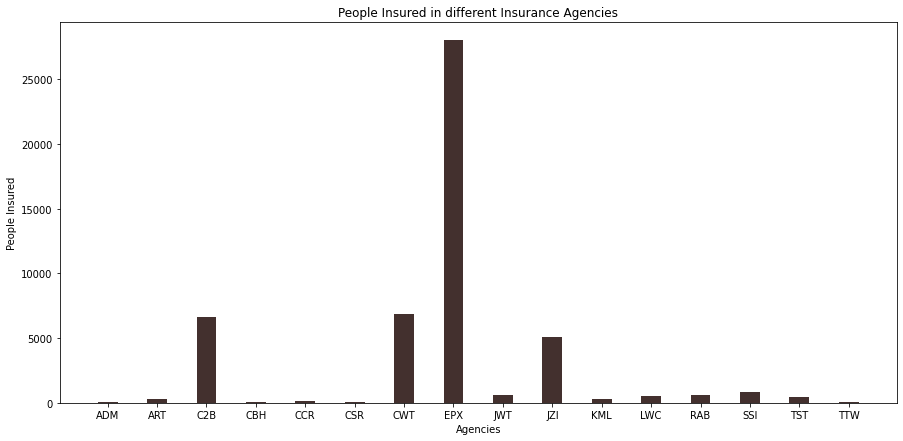

In [525]:
agency = df.groupby(by=["Agency"]).size().reset_index(name="counts")
plt.figure(figsize = (15, 7))
plt.bar(agency['Agency'], agency['counts'], color = '#43302E',  width = 0.4)
plt.xlabel("Agencies")
plt.ylabel("People Insured")
plt.title("People Insured in different Insurance Agencies")
plt.show()



> The majority of people are insured under EPX agency.



In [526]:
prod = df.groupby(by=["Product Name"]).size().reset_index(name="counts")
fig = px.pie(prod, values='counts', names='Product Name', title='People Insured Under Different Plans')
fig.show()



> The pie chart shows that majority of travel insured people have opted for Cancellation Plan



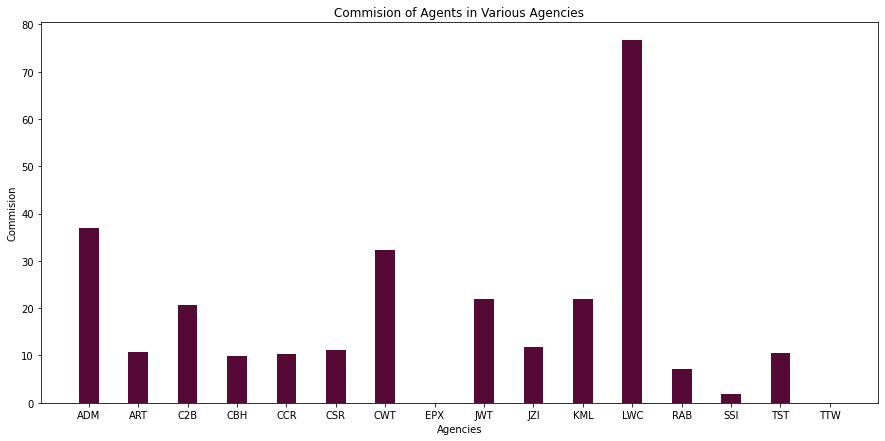

In [527]:
comm = df.groupby(by=['Agency']).mean().reset_index()
comm.head()
plt.figure(figsize = (15, 7))
plt.bar(comm['Agency'], comm['Commision'], color ='#550A35', width = 0.4)
plt.xlabel("Agencies")
plt.ylabel("Commision")
plt.title("Commision of Agents in Various Agencies")
plt.show()



> From Graph we can see that
*   LWC is the agency that gives maximum commision to its agents 
*   While EPX gives no commision



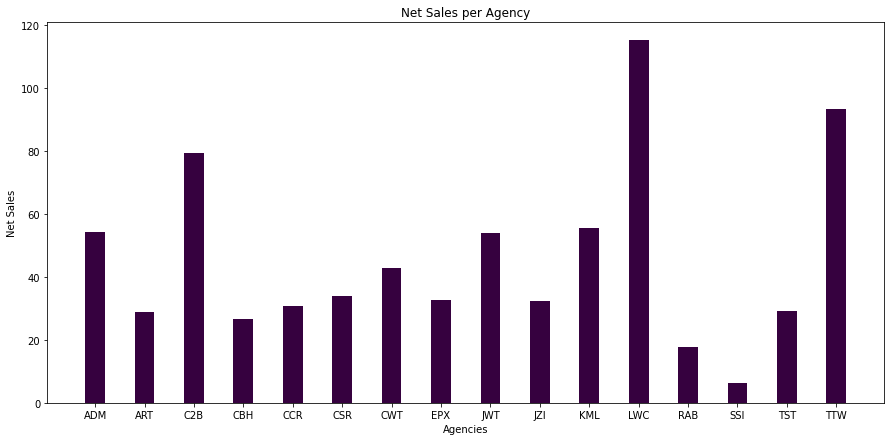

In [528]:
plt.figure(figsize = (15, 7))
plt.bar(comm['Agency'], comm['Net Sales'], color ='#36013F', width = 0.4)
plt.xlabel("Agencies")
plt.ylabel("Net Sales")
plt.title("Net Sales per Agency")
plt.show()

> From Graph we can see that
*   LWC has Highes Sales 
*   SSI has Lowest Sales



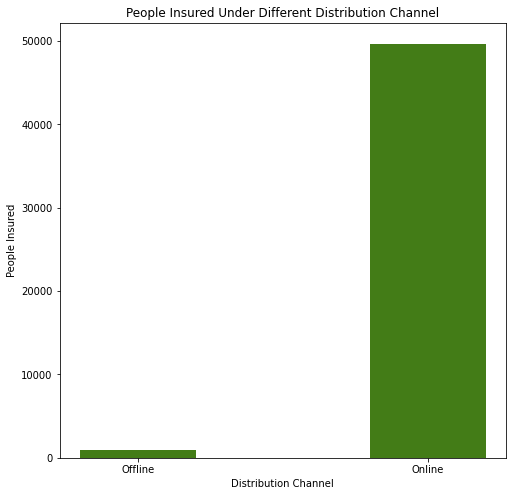

In [529]:
ds = df.groupby(by=['Distribution Channel']).size().reset_index(name="counts")
plt.figure(figsize = (8,8))
plt.bar(ds['Distribution Channel'], ds['counts'], color = '#437C17', width = 0.4)
plt.xlabel("Distribution Channel")
plt.ylabel("People Insured")
plt.title("People Insured Under Different Distribution Channel")
plt.show()



> Maximum Sales are from Online Channel



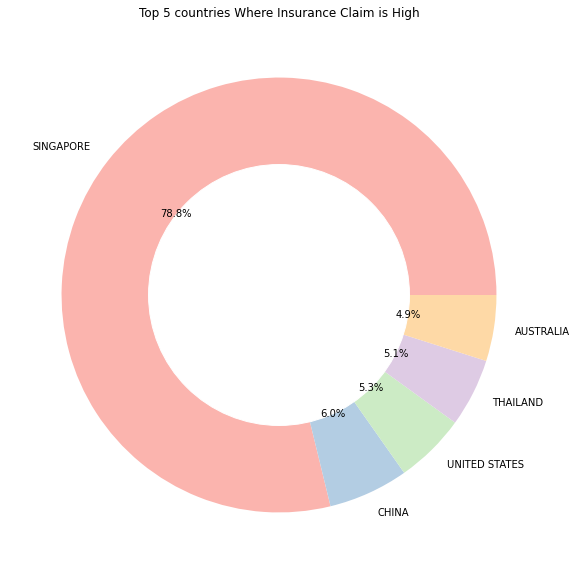

In [530]:
cla = df.loc[df['Claim'] == 1]
dest = cla.groupby(by=["Destination"]).size().reset_index(name = "counts")
dest_l = dest.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.figure(figsize = (10,10))
plt.pie(dest_l['counts'], labels = dest_l['Destination'], autopct='%1.1f%%', colors = Pastel1_7.hex_colors)
plt.title('Top 5 countries Where Insurance Claim is High')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



> Singapore tops the list with maximum number of claim request filed.



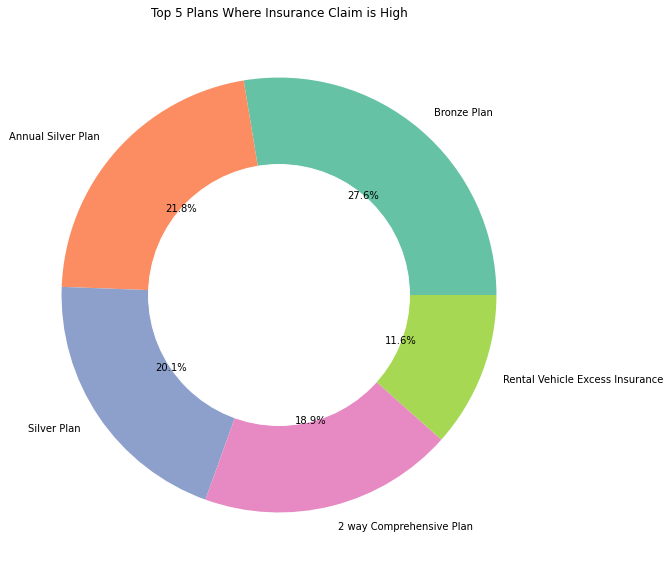

In [531]:
prod = cla.groupby(by=["Product Name"]).size().reset_index(name = "counts")
L_prod = prod.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.figure(figsize = (10,10))
plt.pie(L_prod['counts'], labels = L_prod['Product Name'], autopct='%1.1f%%', colors = Set2_7.hex_colors)
plt.title('Top 5 Plans Where Insurance Claim is High')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



> The majority claim requests are coming from Bronze Plan and Annual Silver Plan.



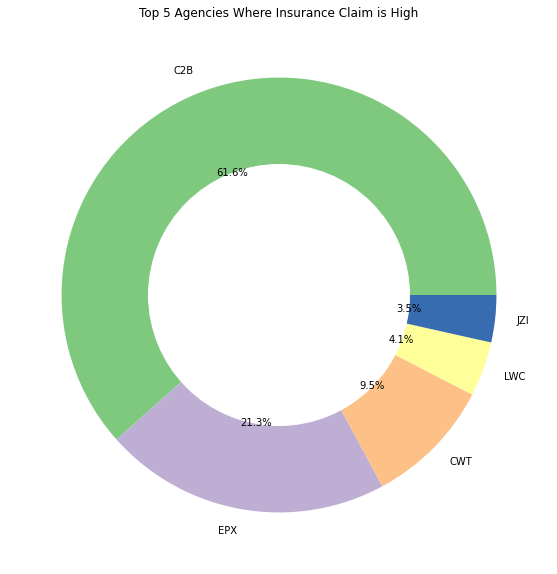

In [532]:
agen = cla.groupby(by = ["Agency"]).size().reset_index(name = "counts")
L_agen = agen.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.figure(figsize = (10,10))
plt.pie(L_agen['counts'], labels = L_agen['Agency'], autopct = '%1.1f%%', colors = Accent_7.hex_colors)
plt.title('Top 5 Agencies Where Insurance Claim is High')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



> The maximum claim requests have come to the agency called C2B.



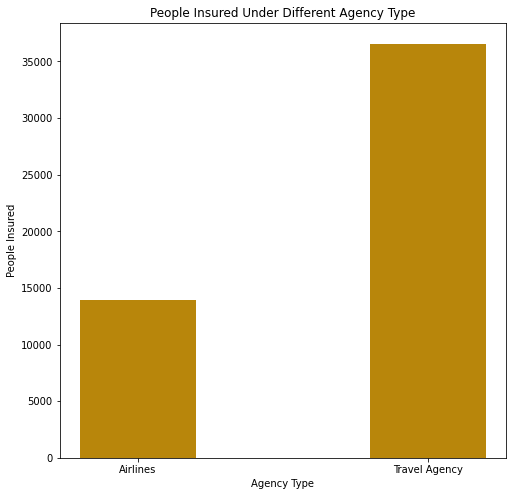

In [533]:
agen_t = df.groupby(by = ['Agency Type']).size().reset_index(name = "counts")
plt.figure(figsize = (8,8))
plt.bar(agen_t['Agency Type'], agen_t['counts'], color ='#B8860B',width = 0.4)
plt.xlabel("Agency Type")
plt.ylabel("People Insured")
plt.title("People Insured Under Different Agency Type")
plt.show()



> Majority of People go the Insurance via Travel Agencies




```
# Reassigning values for visualisation

```



In [534]:
df.loc[df['Claim'] == 0, 'Claim'] = 'No'
df.loc[df['Claim'] == 1, 'Claim'] = 'Yes'

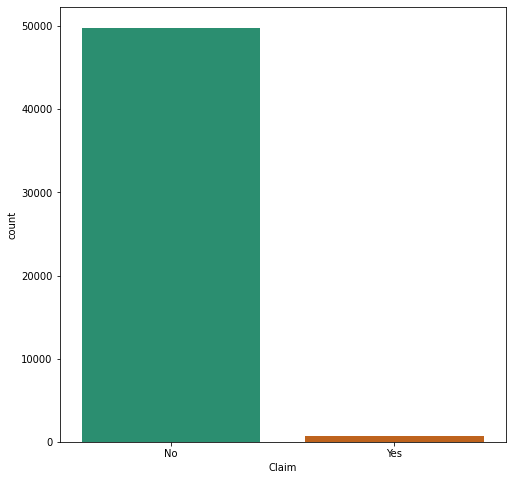

In [535]:
plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = "Claim", palette = Dark2_7.hex_colors)
plt.show()



> Around 900 people have requested for claim out of total policy holders which is around 1.4%.




```
# Reassigning values for learning
```



In [536]:
df.loc[df['Claim'] == 'No', 'Claim'] = 0
df.loc[df['Claim'] == 'Yes', 'Claim'] = 1

In [537]:
y = df['Claim']
df.drop('Claim', axis = 1, inplace = True)

**Splitting the Data into Categorical and Numerical**

In [538]:
df_cat = df.select_dtypes(include = [object])
df_num = df.select_dtypes(include = [int, float])
df_cat

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"
...,...,...,...,...,...
50548,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NETHERLANDS
50549,EPX,Travel Agency,Online,1 way Comprehensive Plan,INDONESIA
50550,KML,Travel Agency,Online,Value Plan,INDONESIA
50551,EPX,Travel Agency,Online,Cancellation Plan,BELGIUM




```
# Using label Encoder to assign sampling to Categorical Data
```



In [539]:
le = LabelEncoder()

for col in df_cat:
  df_cat[col] = le.fit_transform(df_cat[col])

df_cat

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47
...,...,...,...,...,...
50548,6,1,1,16,65
50549,7,1,1,0,38
50550,10,1,1,24,38
50551,7,1,1,10,7


**Concating the Categorical and Nummerical Data into New**

In [540]:
X = pd.concat([df_cat, df_num], axis = 1)
X

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Duration,Net Sales,Commision,Age
0,6,1,1,16,56,7,0.0,17.82,31
1,7,1,1,10,79,85,69.0,0.00,36
2,6,1,1,16,56,11,19.8,11.88,75
3,7,1,1,1,38,16,20.0,0.00,32
4,7,1,1,10,47,10,15.0,0.00,29
...,...,...,...,...,...,...,...,...,...
50548,6,1,1,16,65,11,99.0,59.40,50
50549,7,1,1,0,38,48,20.0,0.00,36
50550,10,1,1,24,38,24,28.0,10.64,48
50551,7,1,1,10,7,25,15.0,0.00,36




```
# Using Min Max Scaler to set data points in between 0 & 1 for calculations
```



In [541]:
mmx = MinMaxScaler()

for col in X:
  X[col] = mmx.fit_transform(np.array(X[col]).reshape((-1, 1)))

X

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Duration,Net Sales,Commision,Age
0,0.400000,1.0,1.0,0.666667,0.554455,0.001843,0.324437,0.062857,0.262712
1,0.466667,1.0,1.0,0.416667,0.782178,0.017817,0.381985,0.000000,0.305085
2,0.400000,1.0,1.0,0.666667,0.554455,0.002662,0.340951,0.041905,0.635593
3,0.466667,1.0,1.0,0.041667,0.376238,0.003686,0.341118,0.000000,0.271186
4,0.466667,1.0,1.0,0.416667,0.465347,0.002458,0.336947,0.000000,0.245763
...,...,...,...,...,...,...,...,...,...
50548,0.400000,1.0,1.0,0.666667,0.643564,0.002662,0.407006,0.209524,0.423729
50549,0.466667,1.0,1.0,0.000000,0.376238,0.010240,0.341118,0.000000,0.305085
50550,0.666667,1.0,1.0,1.000000,0.376238,0.005325,0.347790,0.037531,0.406780
50551,0.466667,1.0,1.0,0.416667,0.069307,0.005529,0.336947,0.000000,0.305085


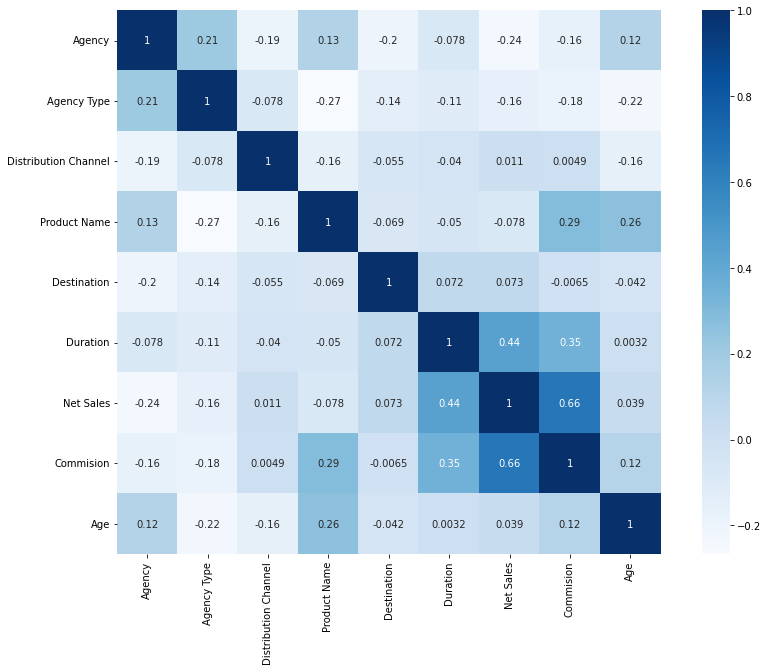

In [542]:
plt.figure(figsize = (15, 10))
sns.heatmap(X.corr(), square = True, annot = True, cmap = 'Blues')
plt.show()



> Clearly there is no high colinearity among any of the features.


In [543]:
# Converting the Data type
y = y.astype(dtype = int)

**Using Over Sampling technique to balance the imbalance data**

In [544]:
rm = RandomOverSampler(sampling_strategy = 'auto')
X,y = rm.fit_resample(X,y)

# Train_Test_Split

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [546]:
print('X_train Size:', X_train.shape)
print('X_test Size:', X_test.shape)
print('y_train Size:', y_train.shape)
print('y_test Size:', y_test.shape)

X_train Size: (69736, 9)
X_test Size: (29888, 9)
y_train Size: (69736,)
y_test Size: (29888,)


# **Random Forest Classifer**

***Using Random Forest Classifier for Comparing***

In [547]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [548]:
print('--------------------------')
print("Score:", accuracy_score(y_test, rfc_pred) * 100)
print('------------------------------------------------------')
print(classification_report(y_test, rfc_pred))
print('------------------------------------------------------')

--------------------------
Score: 99.40109743040685
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14866
           1       0.99      1.00      0.99     15022

    accuracy                           0.99     29888
   macro avg       0.99      0.99      0.99     29888
weighted avg       0.99      0.99      0.99     29888

------------------------------------------------------


Text(51.0, 0.5, 'True')

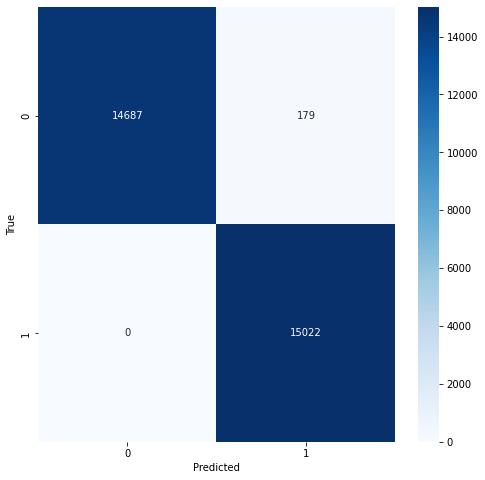

In [549]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = rfc_pred)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')

# **Artificail Neural Network**

In [550]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim = 9))
model.add(Dense(150, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [551]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [552]:
model.fit(X_train,y_train, batch_size = 32, epochs=25)

Epoch 1/25
2180/2180 [==============================] - 8s 3ms/step - loss: 0.5412
Epoch 2/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.5157
Epoch 3/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.5105
Epoch 4/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.5043
Epoch 5/25
2180/2180 [==============================] - 8s 4ms/step - loss: 0.4989
Epoch 6/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4920
Epoch 7/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4838
Epoch 8/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4751
Epoch 9/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4642
Epoch 10/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4564
Epoch 11/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4458
Epoch 12/25
2180/2180 [==============================] - 7s 3ms/step - loss: 0.4386
E

In [553]:
model_pred = model.predict(X_test)
model_pred = np.where(model_pred >= 0.5, 1, 0)

In [554]:
print('--------------------------')
print("Score:", accuracy_score(y_test, model_pred) * 100)
print('------------------------------------------------------')
print(classification_report(y_test, model_pred))
print('------------------------------------------------------')

--------------------------
Score: 84.98059421841542
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     14866
           1       0.82      0.89      0.86     15022

    accuracy                           0.85     29888
   macro avg       0.85      0.85      0.85     29888
weighted avg       0.85      0.85      0.85     29888

------------------------------------------------------


Text(51.0, 0.5, 'True')

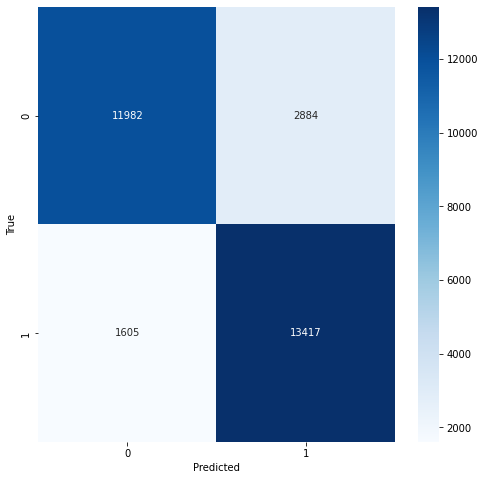

In [555]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = model_pred)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')